# Coursera Dataset
#### Course dataset scrapped from Coursera website

- Cleaning data
- Analyzing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read & Clean Data 

In [2]:
# Read csv file
df = pd.read_csv("coursea_data.csv", index_col=0)
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [3]:
# Check the size of the data
df.shape

(891, 6)

In [4]:
# Check dtypes
df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [5]:
# Check null value
df.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [6]:
# Conver the column "course_students_enrolled" to integer 
df['course_students_enrolled'] = df['course_students_enrolled'].str.replace("k", "*1000")
df['course_students_enrolled'] = df['course_students_enrolled'].str.replace("m", "*1000000")
df['course_students_enrolled'] = df['course_students_enrolled'].map(lambda x: eval(x))

In [7]:
df['course_students_enrolled'] = df['course_students_enrolled'].astype(int)
df['course_students_enrolled'].head()

134      5300
743     17000
874    130000
413     91000
635    320000
Name: course_students_enrolled, dtype: int32

In [8]:
df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled      int32
dtype: object

# Analyze 

## Top 10 Organizations provide the highest number of course

In [9]:
organization = pd.DataFrame(df.course_organization.value_counts().sort_values(ascending=False).head(10))
organization

,course_organization
University of Pennsylvania,59
University of Michigan,41
Google Cloud,34
Johns Hopkins University,28
Duke University,28
"University of California, Irvine",27
IBM,22
University of Illinois at Urbana-Champaign,22
"University of California, Davis",21
University of Colorado Boulder,19


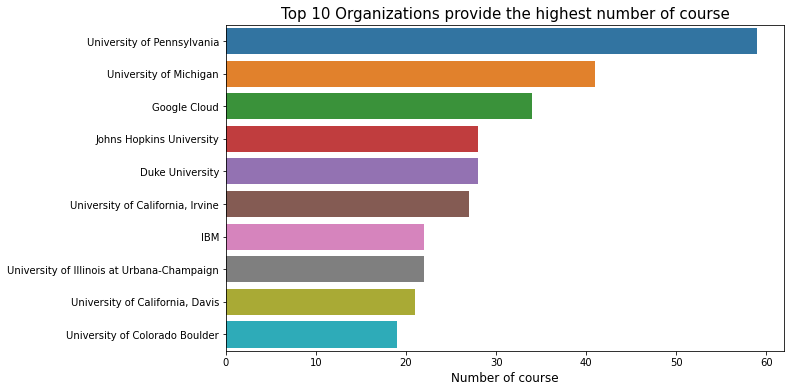

In [64]:
# Plotting organization
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='course_organization', y=organization.index, data=organization, ax=ax)
ax.set_xlabel("Number of course", fontsize=12)
plt.title("Top 10 Organizations provide the highest number of course", fontsize=15)
plt.show()

## Ratio of Each Course Type 

In [11]:
# Count of each Certificate type 
cert_type = df['course_Certificate_type'].value_counts()
cert_type

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

In [12]:
diff_type = df['course_difficulty'].value_counts()
diff_type

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_difficulty, dtype: int64

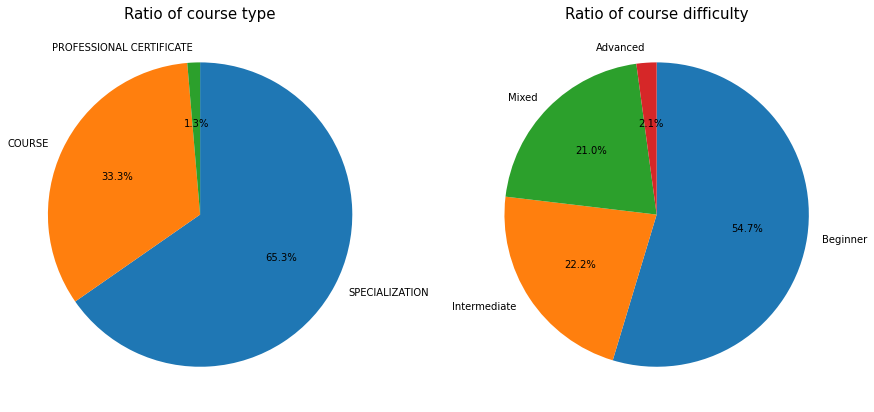

In [13]:
# plot pie chart of the certification type ratio
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15,15)

courses = df['course_Certificate_type'].unique()
diff = df['course_difficulty'].unique()

ax1.pie(cert_type, labels=courses, autopct='%1.1f%%', startangle=90, counterclock=False)
ax1.set_title("Ratio of course type", fontsize=15)

ax2.pie(diff_type, labels=diff, autopct='%1.1f%%', startangle=90, counterclock=False)
ax2.set_title("Ratio of course difficulty", fontsize=15)

plt.show()

# Top 10 organizations with rating and number of enrollment

In [14]:
rating = pd.DataFrame(df.groupby('course_organization')['course_rating'].mean().sort_values(ascending=False).head(10))
rating

,course_rating
course_organization,
Hebrew University of Jerusalem,4.900000
"Nanyang Technological University, Singapore",4.900000
Universidade Estadual de Campinas,4.900000
Crece con Google,4.900000
London Business School,4.900000
Google - Spectrum Sharing,4.900000
ScrumTrek,4.900000
Universidade de São Paulo,4.866667
The University of Chicago,4.850000


In [15]:
enrolled = pd.DataFrame(df.groupby('course_organization')['course_students_enrolled'].mean().sort_values(ascending=False).head(10))
enrolled

,course_students_enrolled
course_organization,
Stanford University,303375.000000
Yale University,232470.588235
McMaster University,230000.000000
Google - Spectrum Sharing,210000.000000
Ludwig-Maximilians-Universität München (LMU),192500.000000
École Polytechnique,190000.000000
University of Michigan,181407.317073
Georgia Institute of Technology,181300.000000
deeplearning.ai,178962.500000


### Count by Course difficulty by rating

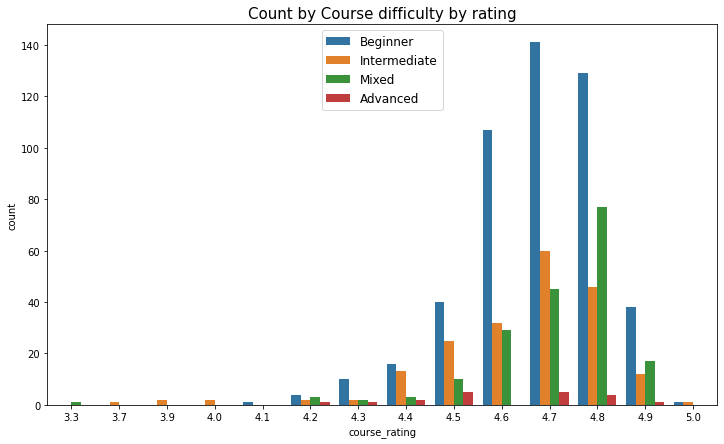

In [57]:
fig, ax = plt.subplots(figsize=(12,7))

sns.countplot(x = 'course_rating', hue='course_difficulty', data=df)

ax.set_title("Count by Course difficulty by rating", fontsize=15)
ax.legend(fontsize=12)

plt.show()

### Correlation between course_rating and course_students_enrolled

In [62]:
corr = df.corr()
corr

,course_rating,course_students_enrolled
course_rating,1.00000,0.07109
course_students_enrolled,0.07109,1.00000


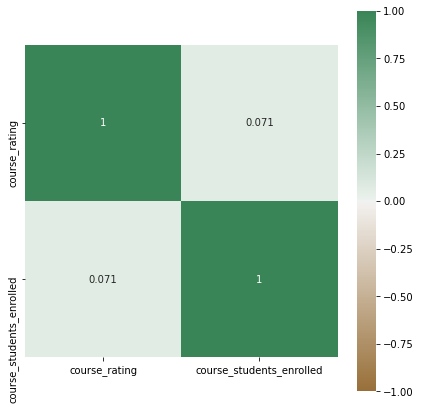

In [63]:
# Correlation between course_rating and course_students_enrolled
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap=sns.diverging_palette(50, 500, n=500), square=True,  ax=ax)
plt.show()